# Examples of how to use the generated artifacts

In [1]:
import os
from PIL import Image, ImageDraw

import numpy as np
import matplotlib.pyplot as plt
# from scipy import interpolate
# from scipy.ndimage import morphology
# from scipy.stats import multivariate_normal
# from deconvolution import Deconvolution

import cv2

import img_manip

## Example sample from the LUAD/LUSC dataset

A single slide from this dataset has been included as part of this repository, so that if you want to experiment with the artifact generation, you don't have to download the entire dataset

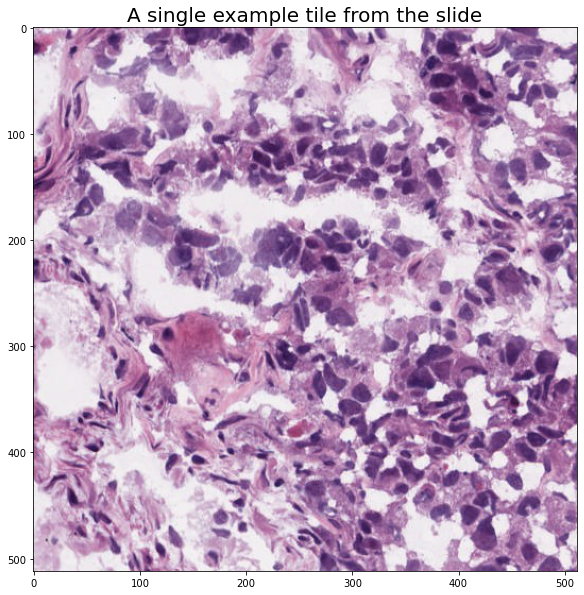

In [2]:
cDir = os.path.join('..','example_data','intermediate','all','tiles',
                    'TCGA-05-4245-01A-01-BS1.41d3cf23-4e36-4e42-9e08-adfea139f37e_files',
                   '20.0')
cFile = os.path.join(cDir,'5_17.jpeg')
im = Image.open(cFile)
fig,ax = plt.subplots(figsize=(10, 10))
ax.set_title('A single example tile from the slide',fontsize = 20)
plt.imshow(im)
plt.show()


## Artifact Generation using Default settings
The examples have the randomized artifacts seeded by the name of the file, so this should produce the same output each time.

The files in this example will be stored in /example_data/example_out  
The artifact generation fuction also returns an image as output

In [3]:
outDir = os.path.join('..','example_data','example_out')
bubb_im  = img_manip.apply_artifact(cFile,'bubbles', outputDir = outDir)
mark_im  = img_manip.apply_artifact(cFile,'marker', outputDir = outDir)
fold_im  = img_manip.apply_artifact(cFile,'fold', outputDir = outDir)
sect_im  = img_manip.apply_artifact(cFile,'sectioning', outputDir = outDir)
illu_im  = img_manip.apply_artifact(cFile,'illumination', outputDir = outDir)
stain_im = img_manip.apply_artifact(cFile,'stain', outputDir = outDir)
tear_im  = img_manip.apply_artifact(cFile,'tear', outputDir = outDir)

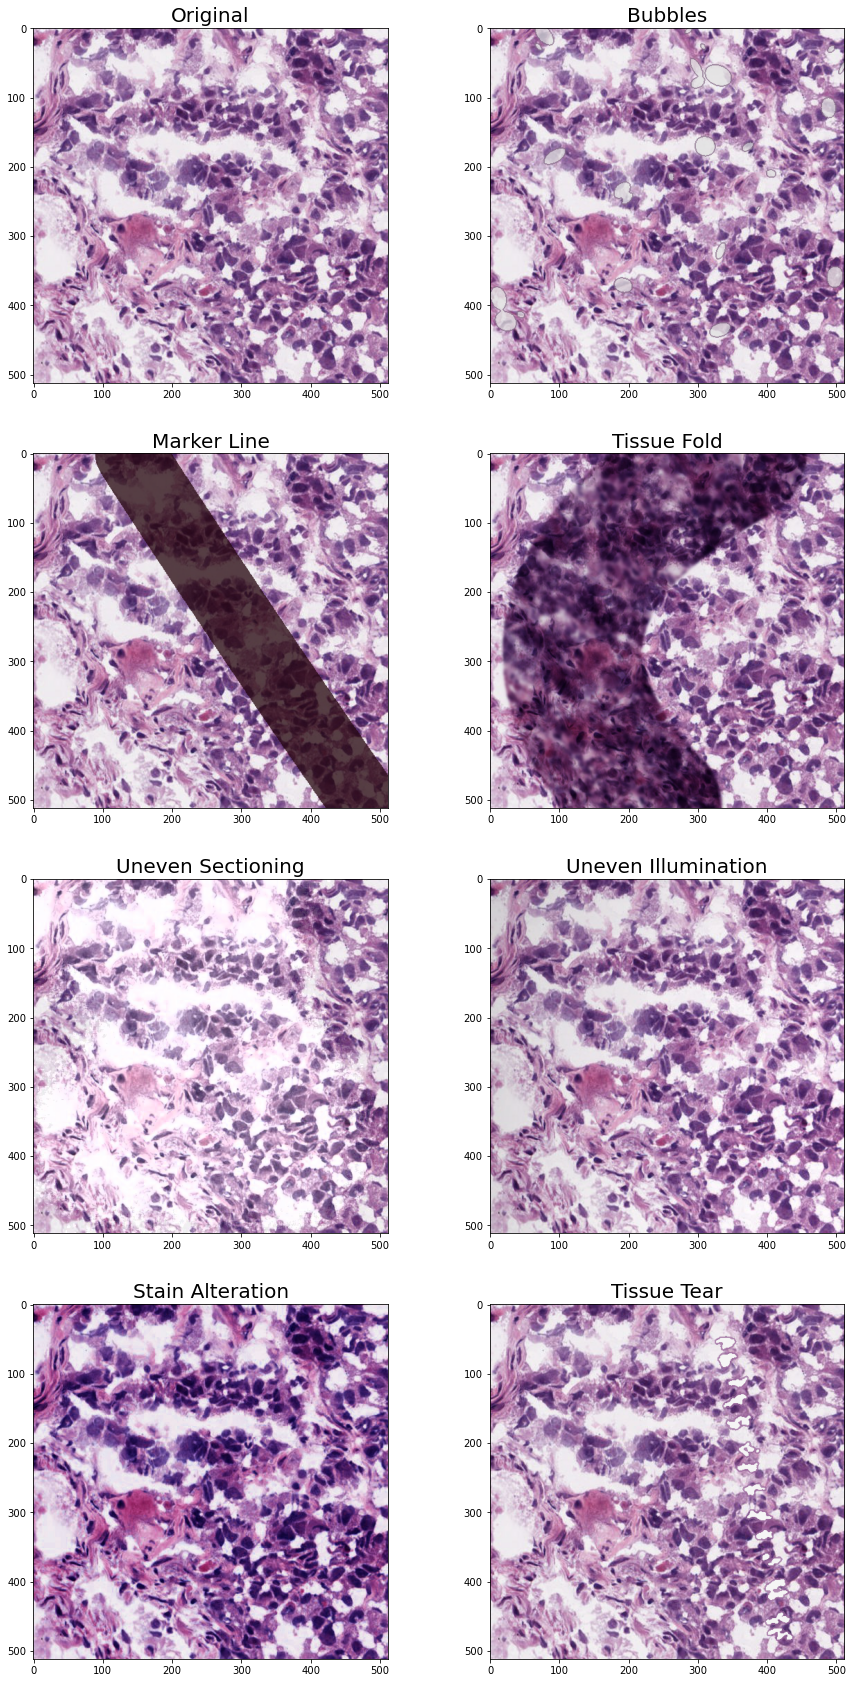

In [4]:
fig,axs = plt.subplots(4,2,figsize=(15, 30))
axs[0,0].imshow(im)
axs[0,0].set_title('Original',fontsize = 20)
axs[0,1].imshow(bubb_im)
axs[0,1].set_title('Bubbles',fontsize = 20)
axs[1,0].imshow(mark_im)
axs[1,0].set_title('Marker Line',fontsize = 20)
axs[1,1].imshow(fold_im)
axs[1,1].set_title('Tissue Fold',fontsize = 20)
axs[2,0].imshow(sect_im)
axs[2,0].set_title('Uneven Sectioning',fontsize = 20)
axs[2,1].imshow(illu_im)
axs[2,1].set_title('Uneven Illumination',fontsize = 20)
axs[3,0].imshow(stain_im)
axs[3,0].set_title('Stain Alteration',fontsize = 20)
axs[3,1].imshow(tear_im)
axs[3,1].set_title('Tissue Tear',fontsize = 20)
plt.show()

### Bubbles parameter tweaks
You can tweak the number of bubbles generated on this example, the size, color, and transparency.  There is a potential to adjust the generation of the Gaussian distributions but for now this is not accessible at the top level of this generated artifact.  More information on what the parameters do in img_manip.py. 
Base parameters: 
- random_seed = None
- nBubbles = 25
- maxWidth = 50
- alpha = .75
- edgeWidth = 2
- edgeColorMult = (.75,.75,.75)
- rgbVal = (225,225,225)
 
The following example shows bubbles of different sizes, and an example with dark bubbles

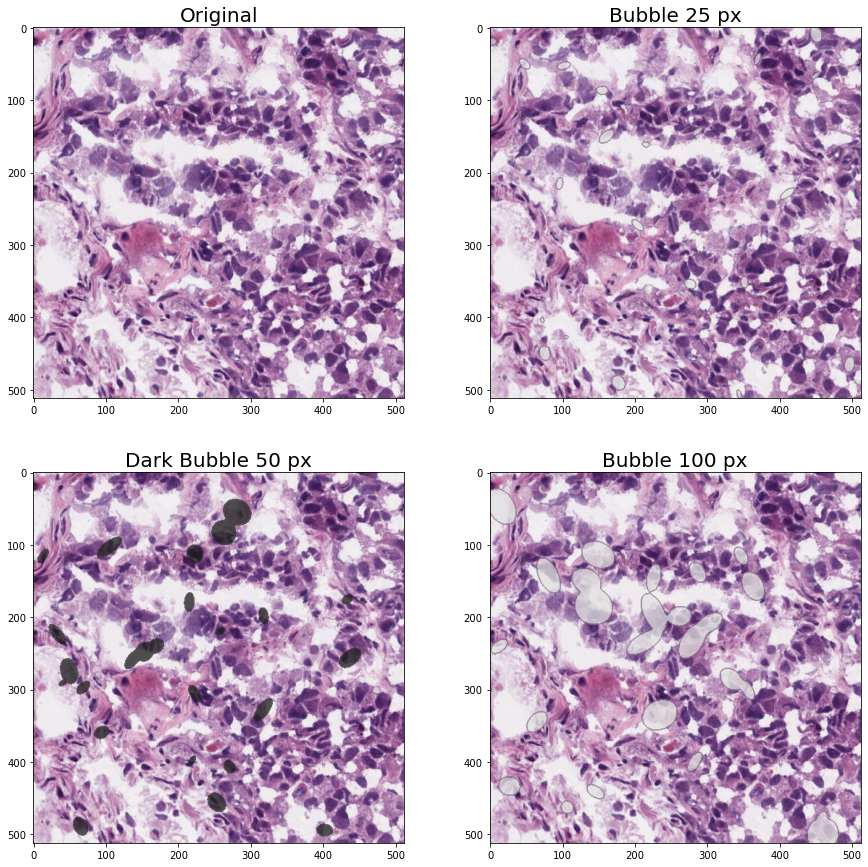

In [9]:
bubb_1 = img_manip.add_bubbles(im,random_seed = 1, maxWidth = 25)
bubb_2 = img_manip.add_bubbles(im,random_seed = 2, maxWidth = 50, rgbVal = (25,25,25), edgeColorMult= (.25,.25,.25))
bubb_3 = img_manip.add_bubbles(im,random_seed = 3, maxWidth = 100)

fig,axs = plt.subplots(2,2,figsize=(15, 15))
axs[0,0].imshow(im)
axs[0,0].set_title('Original',fontsize = 20)
axs[0,1].imshow(bubb_1)
axs[0,1].set_title('Bubble 25 px',fontsize = 20)
axs[1,0].imshow(bubb_2)
axs[1,0].set_title('Dark Bubble 50 px',fontsize = 20)
axs[1,1].imshow(bubb_3)
axs[1,1].set_title('Bubble 100 px',fontsize = 20)
plt.show()

### Marker Artifact Parameter Tweaks  
You can tweak the size, width, color, transparency and flexibility of the marker line. Or provide a spline where the marker lies.  More information on what the parameters do in img_manip.py. 
Base parameters: 
- random_seed = None
- nPts = 3
- sampSpl = None
- inPts = None
- width = 100
- alpha = .75
- rgbVal= None
- rgbRange = np.array([[0,50],[0,50],[0,100]])
  
This example shows the variation across random seeds and how to change the width of the marker line

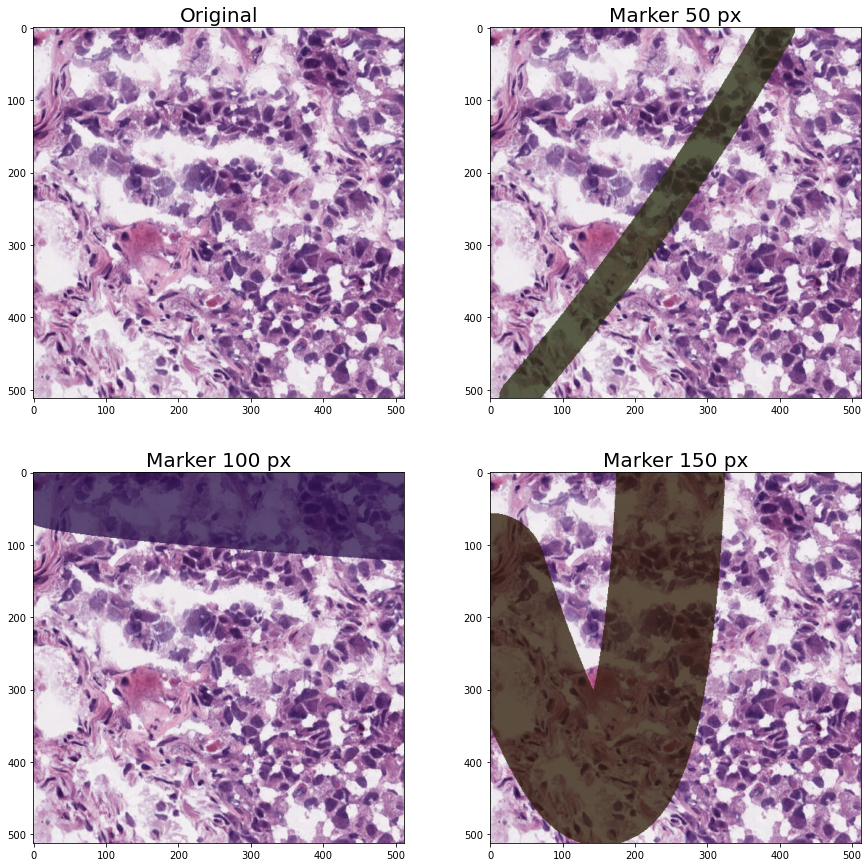

In [7]:
mark_1 = img_manip.add_marker(im,random_seed = 1, width = 50)
mark_2 = img_manip.add_marker(im,random_seed = 2, width = 100)
mark_3 = img_manip.add_marker(im,random_seed = 3, width = 150)

fig,axs = plt.subplots(2,2,figsize=(15, 15))
axs[0,0].imshow(im)
axs[0,0].set_title('Original',fontsize = 20)
axs[0,1].imshow(mark_1)
axs[0,1].set_title('Marker 50 px',fontsize = 20)
axs[1,0].imshow(mark_2)
axs[1,0].set_title('Marker 100 px',fontsize = 20)
axs[1,1].imshow(mark_3)
axs[1,1].set_title('Marker 150 px',fontsize = 20)
plt.show()

### Tissue Fold Artifact Parameter Tweaks  
You can tweak the size, path, number of tissue layers and flexibility of the tissue fold. Or provide a spline where the tissue fold lies.  The underlying sample for the tissue fold comes from the original image and the process is repeated recursively to increase the number of layesr.  More information on what the parameters do in img_manip.py. 
Base parameters: 
- sampArr = None
- sampSpl=None
- inPts = None 
- random_seed =None
- scaleXY =[1,1]
- width = 200,
- sampShiftXY = None
- randEdge=False
- nLayers = 2
- nPts = 3
- endEdge = -2
This example shows variation across different numbers of layers and sizes.

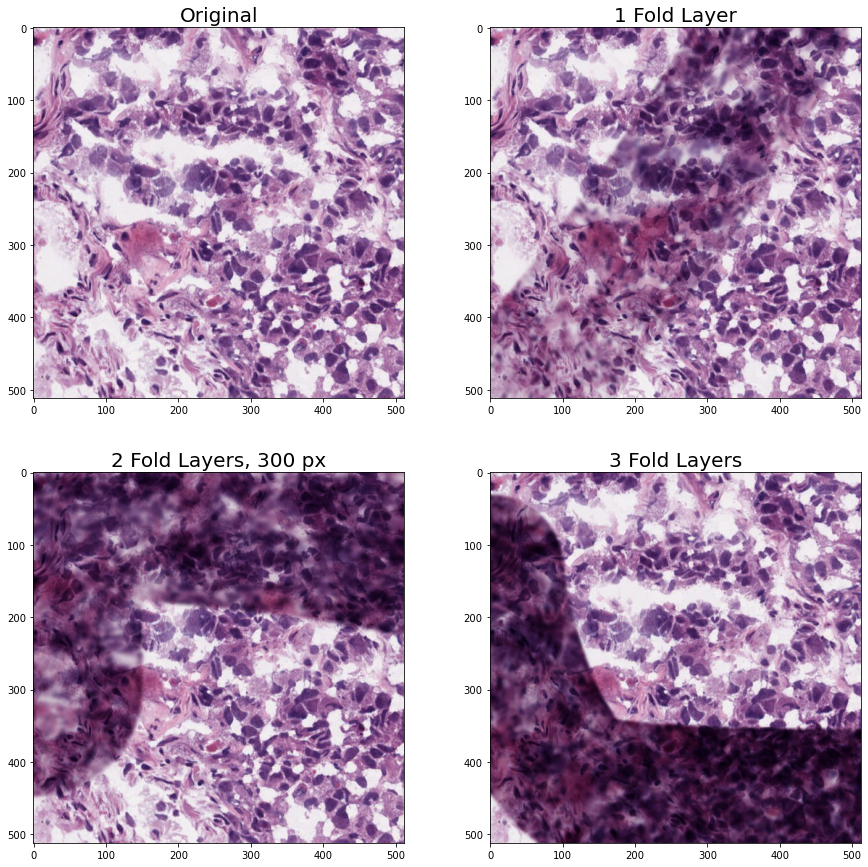

In [11]:
fold_1 = img_manip.add_fold(im,random_seed = 1, nLayers = 1)
fold_2 = img_manip.add_fold(im,random_seed = 2, nLayers = 2, width = 300)
fold_3 = img_manip.add_fold(im,random_seed = 3, nLayers = 3)

fig,axs = plt.subplots(2,2,figsize=(15, 15))
axs[0,0].imshow(im)
axs[0,0].set_title('Original',fontsize = 20)
axs[0,1].imshow(fold_1)
axs[0,1].set_title('1 Fold Layer',fontsize = 20)
axs[1,0].imshow(fold_2)
axs[1,0].set_title('2 Fold Layers, 300 px',fontsize = 20)
axs[1,1].imshow(fold_3)
axs[1,1].set_title('3 Fold Layers',fontsize = 20)
plt.show()

### Uneven Sectioning Artifact Parameter Tweaks  
You can tweak the size, path, potential maximum and minimum intensity decrease of the sectioning artifact. Or provide a spline where the uneven sectioning lies.  More information on what the parameters do in img_manip.py. 
Base parameters: 
- width = 240
- random_seed = None
- scaleMin = .5
- scaleMax = .8
- randEdge = True
- sampSpl = None
- inPts = None
- nPts = 2
- endEdge = -2

This example shows variation across different max and min intensity changes.  Note: the intensity change is randomized within the range.

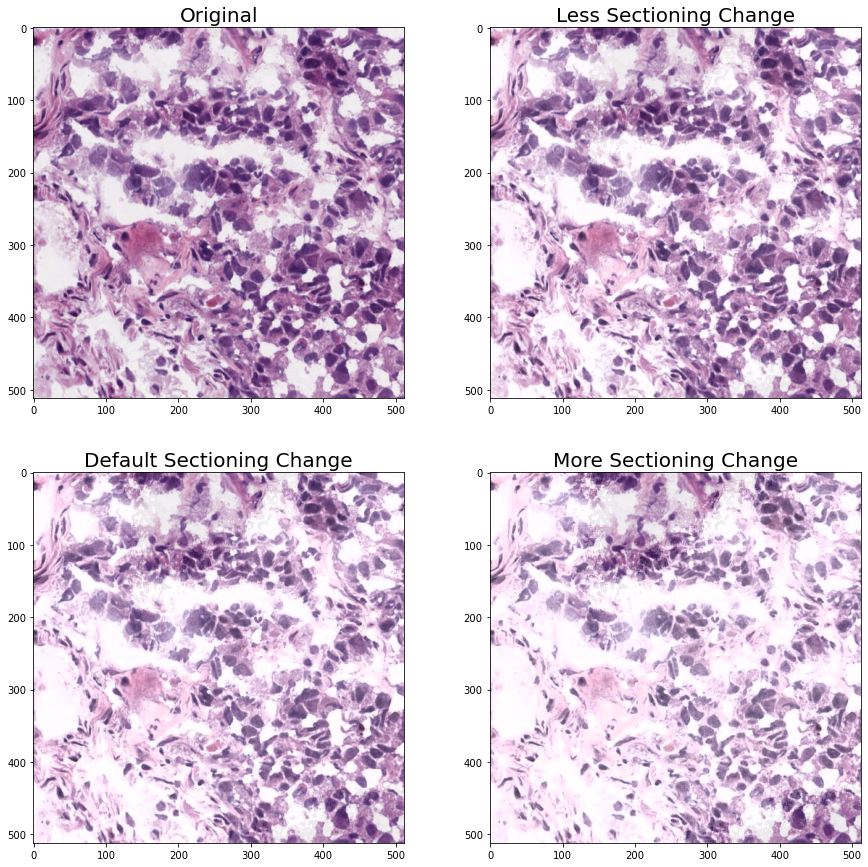

In [14]:
sect_1 = img_manip.add_sectioning(im,random_seed = 2, scaleMin = .65,scaleMax = .95)
sect_2 = img_manip.add_sectioning(im,random_seed = 2, scaleMin = .5,scaleMax = .8)
sect_3 = img_manip.add_sectioning(im,random_seed = 2, scaleMin = .35,scaleMax = .65)

fig,axs = plt.subplots(2,2,figsize=(15, 15))
axs[0,0].imshow(im)
axs[0,0].set_title('Original',fontsize = 20)
axs[0,1].imshow(sect_1)
axs[0,1].set_title('Less Sectioning Change',fontsize = 20)
axs[1,0].imshow(sect_2)
axs[1,0].set_title('Default Sectioning Change',fontsize = 20)
axs[1,1].imshow(sect_3)
axs[1,1].set_title('More Sectioning Change',fontsize = 20)
plt.show()